In [14]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import scipy.stats as stats

# sympy = symbolic math in python
import sympy as sym
import sympy.plotting.plot as symplot

from IPython import display
display.set_matplotlib_formats('svg')

from math import pi

/tmp/ipython-input-2665089528.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Gradiant descent in 1D

In [15]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

def deriv(x):
  return 6*x - 3

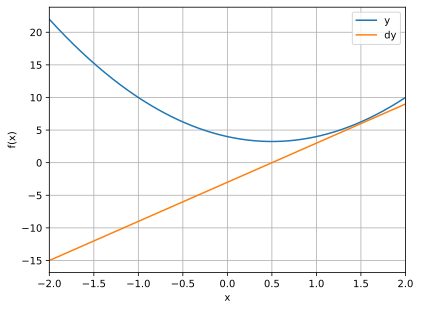

In [16]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

Code to run gradiant descent algorithm

In [17]:
# random starting points
localmin = np.random.choice(x, 1)
starting_value = localmin

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate * grad

print(starting_value)
localmin

[0.036]


array([0.49904654])

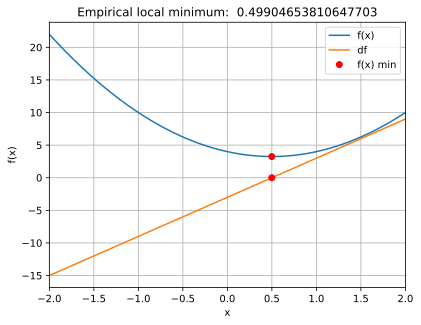

In [18]:
# plot the results
plt.plot(x, fx(x), x ,deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum:  %s'%localmin[0])
plt.show()

Store the model parameters and outputs on each iteration

In [19]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 200

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin[0]
  modelparams[i,1] = grad[0]

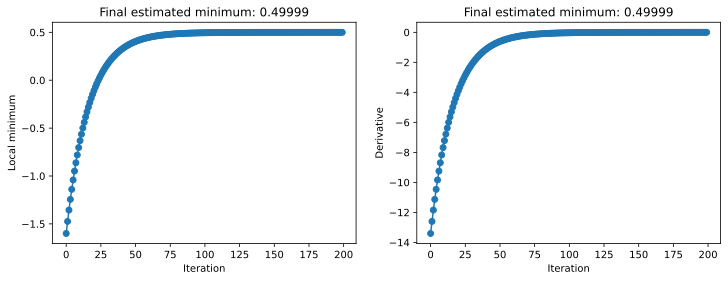

In [20]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

Additional explorations


In [21]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
#
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
#
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative
#    instead of a specified number of training epochs?


# CodeChallenge: Unfortunate starting value

1: Repeat 1D gradient descent to find minimum of following funtion:
  f(x) = cos(2*pi*x) + x**2, x E {-2, 2}

2: Hard-code a starting value of x=0

In [22]:
# Define f(x) and df(x)

def f(x):
  return np.cos(2*np.pi * x) + x**2

def df(x):
  return -2*np.pi*np.sin(2 *np.pi*x) + 2*x

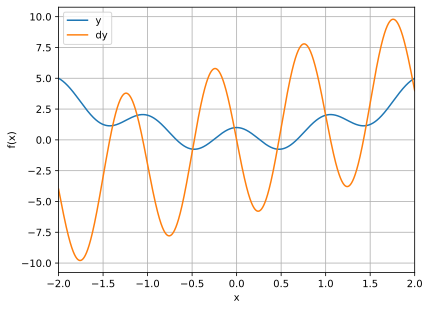

In [23]:
# plotting the function


# define range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x, f(x), x, df(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

Gradiant Descent

In [24]:
# random starting points
localmin = 0
starting_value = localmin

# learning parameters
learning_rate = .01
training_epochs = 200

# run through training
for i in range(training_epochs):
  grad = df(localmin)
  localmin = localmin - learning_rate * grad

  #SOLUTION!
  if f(localmin + 0.01) < f(localmin) and f(localmin - 0.01) < f(localmin):
    localmin = np.random.choice(x, 1)

print(starting_value)
localmin

0


array([0.47580245])

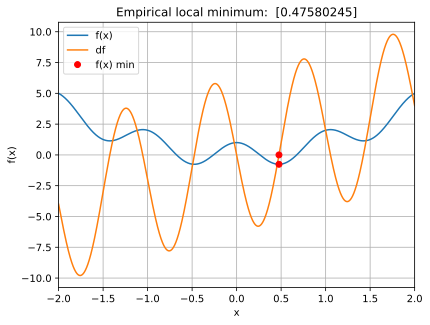

In [25]:
# plot the results
plt.plot(x, f(x), x ,df(x))
plt.plot(localmin, df(localmin), 'ro')
plt.plot(localmin, f(localmin), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum:  %s'%localmin)
plt.show()